In [2]:
import xarray as xr

data = xr.open_zarr('../data/processed/arctic/jan.zarr').load()

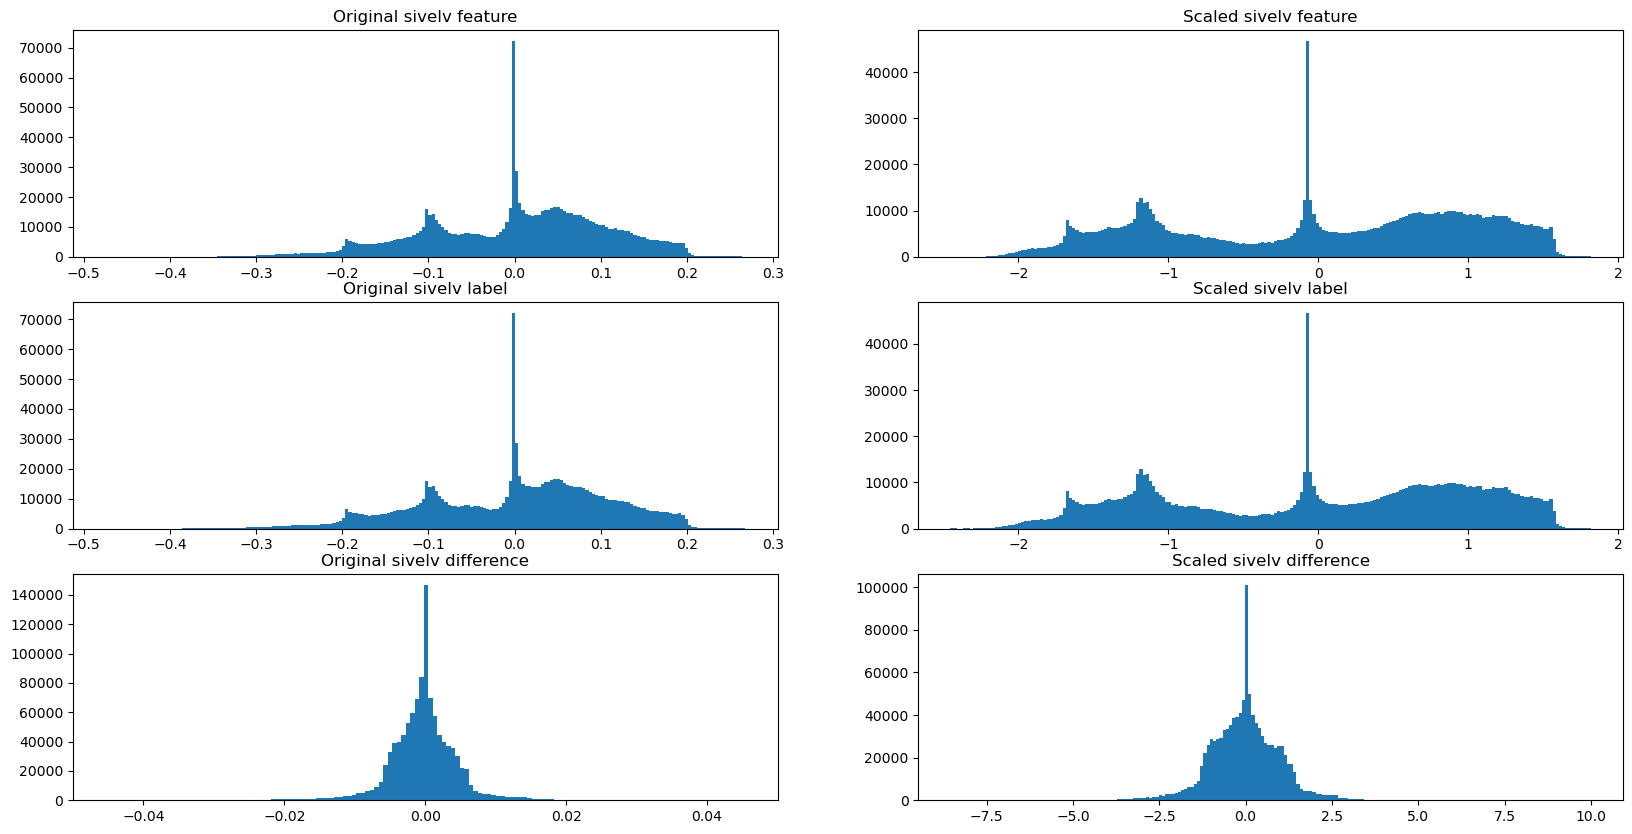

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, FunctionTransformer, StandardScaler

def arcsinh_transform(x):
    return np.arcsinh(x * scale_factor)

def arcsinh_inverse(x):
    return np.sinh(x) / scale_factor

def log_transform(x):
    return np.sign(x) * np.log1p(np.abs(x) * scale_factor)

def log_inverse(x):
    return np.sign(x) * (np.expm1(np.abs(x)) / scale_factor)

asinh_scaler = FunctionTransformer(func=arcsinh_transform, 
                                   inverse_func=arcsinh_inverse, 
                                   validate=True)

log_scaler = FunctionTransformer(func=log_transform,
                                inverse_func=log_inverse,
                                validate=True,
                                check_inverse=False)

preprocessor = Pipeline([
    ('transform', log_scaler),
    ('scaler', StandardScaler())
])
preprocessor2 = copy.deepcopy(preprocessor)
preprocessor3 = copy.deepcopy(preprocessor)

scale_factor = 20
x = data.features.loc["sivelv"].data
x_scaled = preprocessor.fit_transform(x.reshape(-1, 1))

y = data.labels.loc["sivelv"].data
y_scaled = preprocessor2.fit_transform(x.reshape(-1, 1))

scale_factor = 100
diff = x - y
diff_scaled = preprocessor3.fit_transform(diff.reshape(-1, 1))

_, ax = plt.subplots(3, 2, figsize=(20, 10))
ax[0, 0].set(title='Original sivelv feature')
ax[0, 1].set(title='Scaled sivelv feature')
ax[1, 0].set(title='Original sivelv label')
ax[1, 1].set(title='Scaled sivelv label')
ax[2, 0].set(title='Original sivelv difference', xlim=[-0.05, 0.05])
ax[2, 1].set(title='Scaled sivelv difference')

ax[0, 0].hist(x, bins=200)
ax[0, 1].hist(x_scaled, bins=200)
ax[1, 0].hist(y, bins=200)
ax[1, 1].hist(y_scaled, bins=200)
ax[2, 0].hist(diff, bins=800)
ax[2, 1].hist(diff_scaled, bins=200)
plt.show()